In [1]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.misc import imresize
from skimage.data import astronaut
from tensorflow.python.framework import ops

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

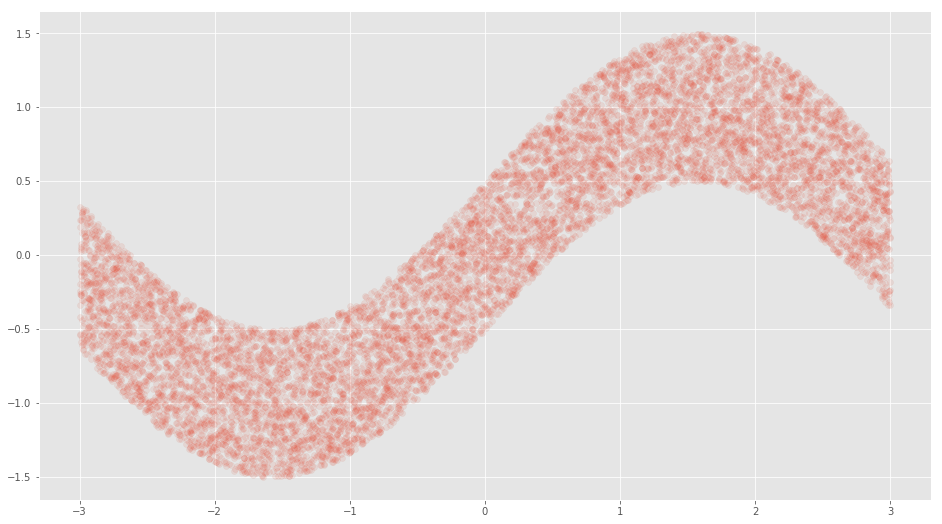

In [2]:
n = 10000
xs = np.linspace(-3, 3, n)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n)
plt.scatter(xs, ys, alpha = 0.1);

In [3]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

W = tf.Variable(
    tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'W')
b = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'b')
preds = X * W + b

In [4]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [5]:
# cost = distance(preds, tf.sin(X)) # approximated by
cost = distance(preds, Y)

In [6]:
# Using a TF optimizer
cost = tf.reduce_mean(distance(preds, Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)\
    .minimize(cost)

In [7]:
n_iterations = 500

In [8]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        s.run(optimizer, feed_dict = { X: xs, Y: ys })
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
            # If not in notebook:
            #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
            #fig.show()
            #plt.draw()
                        
            print('Training cost:', training_cost)
            
        # Quit when training improvement meets threshold
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost            

Training cost: 1.03834
Training cost: 0.966315
Training cost: 0.89572
Training cost: 0.82646
Training cost: 0.759033
Training cost: 0.695857
Training cost: 0.639084
Training cost: 0.590795
Training cost: 0.551187
Training cost: 0.519417
Training cost: 0.49446
Training cost: 0.474837
Training cost: 0.459337
Training cost: 0.447529
Training cost: 0.438349
Training cost: 0.431178
Training cost: 0.425831
Training cost: 0.421754
Training cost: 0.418631
Training cost: 0.416273
Training cost: 0.414564
Training cost: 0.41336
Training cost: 0.412493
Training cost: 0.41184
Training cost: 0.41135
Training cost: 0.410965
Training cost: 0.41069
Training cost: 0.410497
Training cost: 0.410356
Training cost: 0.410252
Training cost: 0.410184
Training cost: 0.410135
Training cost: 0.410098
Training cost: 0.410074
Training cost: 0.410058


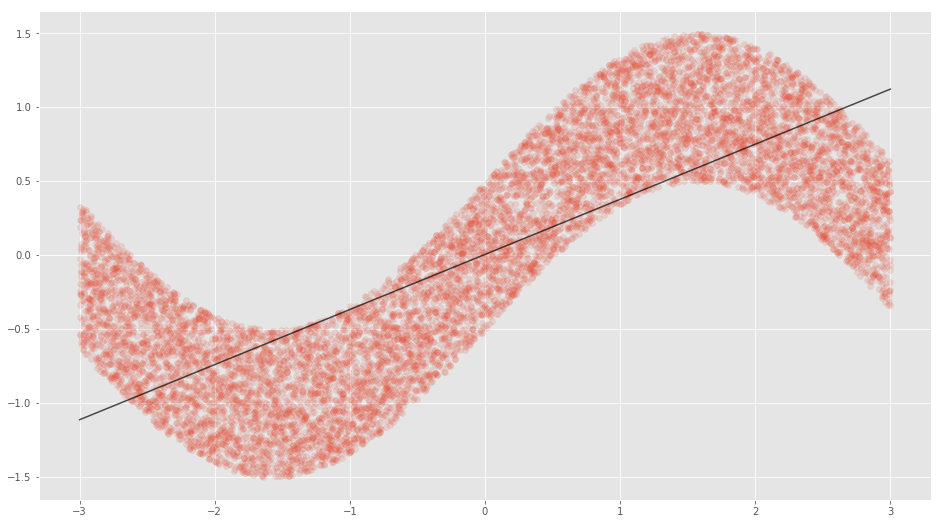

In [9]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15);
ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations);

## Stochastic and Mini Batch GD

In [10]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size

for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])
    
# BAD IDEA: network will pick up on orderin of data as a signal...
# better to randomize

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [11]:
rand_idxs = np.random.permutation(idxs)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[ 7 59  9 32 27 34 65 44 53  0]
[68 54 10 40 67 81 85 84 43 24]
[77 28 91  3 96 52 82 58 17  6]
[35 46 19  5 63 48 98  8 15 72]
[42 41 31 26 87 66 55 69 20 73]
[11 21 50 74 45 47 51 18 71 22]
[23  4 94 92 75 95 36 83 14 61]
[ 2 64 80 16 29 99 57 76 88 30]
[90 70 60 62 39 25 86 49 79 13]
[12  1 33 78 56 37 89 38 93 97]


In [12]:
# Incorporate mini-batching into previous:
batch_size = 1000
#fig, ax = plt.subplots(1, 1)
#ax.scatter(xs, ys, alpha=0.15, marker='+')
#ax.set_xlim([-4, 4])
#ax.set_ylim([-2, 2])

with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or 
    # tf.constant_intitializer, then this would have set `W` and `b` to 
    # their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={ X: xs[idxs_i], Y: ys[idxs_i] })

        training_cost = sess.run(cost, feed_dict={ X: xs, Y: ys })

        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict={X: xs}, session=sess)
            #ax.plot(xs, preds, 'k', alpha=it_i / n_iterations)
            print(training_cost)
#fig.show()
#plt.draw()

0.98472
0.479203
0.413628
0.410146
0.410022
0.41002
0.41002
0.410019
0.410019
0.410019
0.41002
0.410019
0.410019
0.410019
0.41002
0.41002
0.41002
0.410019
0.410019
0.410019
0.410019
0.41002
0.410019
0.410019
0.41002
0.410019
0.41002
0.41002
0.410019
0.41002
0.410019
0.41002
0.410019
0.41002
0.410019
0.41002
0.410019
0.410019
0.41002
0.410019
0.41002
0.41002
0.41002
0.410019
0.41002
0.410019
0.410019
0.410019
0.410019
0.410019


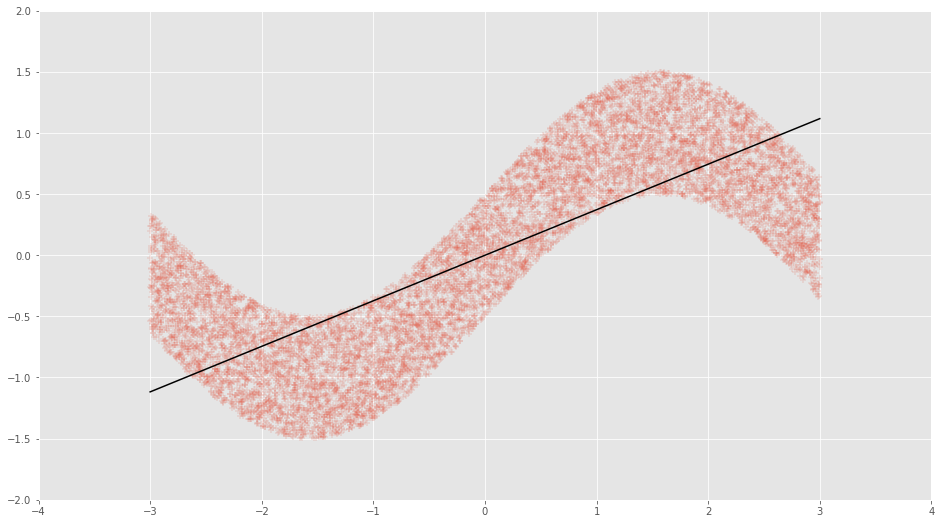

In [13]:
fig, ax = plt.subplots(1, 1);
ax.scatter(xs, ys, alpha = 0.15, marker='+');
ax.set_xlim([-4, 4]);
ax.set_ylim([-2, 2]);
ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations);

In [14]:
def train(X, Y, preds, n_iterations = 100, batch_size = 200, eta = 0.02):
    cost = tf.reduce_mean(distance(preds, Y))
    optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
    
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha = 0.15)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-1.7, 1.7])
    
    with tf.Session() as s:
        s.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size : 
                              (batch_i + 1) * batch_size]
                s.run(optimizer, feed_dict = { X: xs[idxs_i], 
                                               Y: ys[idxs_i] })
            
            training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
            
            if it_i % 10 == 0:
                ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
                #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
                print(training_cost)
    #fig.show();
    #plt.draw();
    ax.plot(xs, ys_pred, 'k')

In [15]:
preds = tf.Variable(tf.random_normal([1]), name = 'bias')

for pow_i in range(0, 4):
    W = tf.Variable(tf.random_normal([1], stddev = 0.1), 
                    name = 'W_%d' %pow_i)
    preds = tf.add(tf.multiply(tf.pow(X, pow_i), W), preds)

0.630292
0.26276
0.254139
0.254032
0.254896
0.257329
0.253784
0.253863
0.255999
0.255702


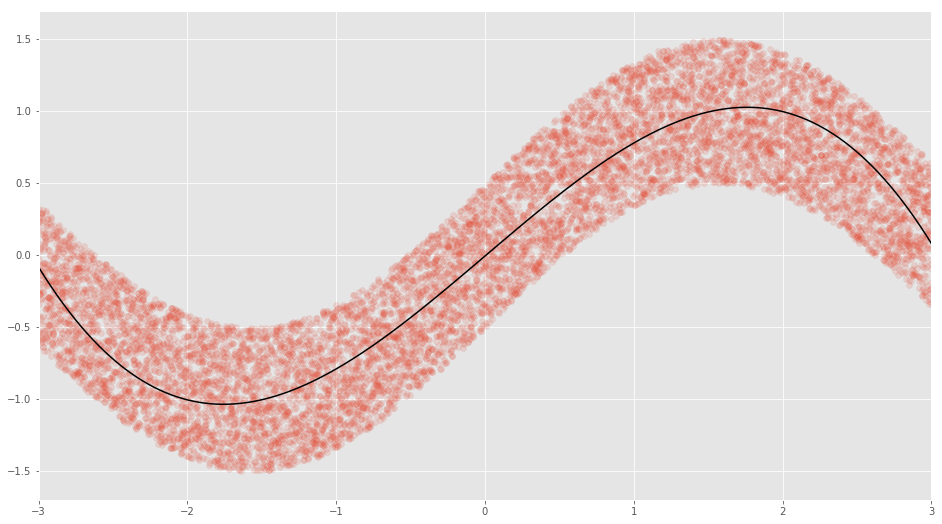

In [16]:
train(X, Y, preds, eta = 0.005)

In [17]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'W')
b = tf.Variable(tf.constant(0, dtype = tf.float32, shape = [n_neurons]), 
                name = 'b')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')

In [18]:
preds = tf.reduce_sum(h, 1)

4.30314
1.30672
0.309716
0.305182
0.301805
0.299187
0.297129
0.295327
0.293661
0.292065


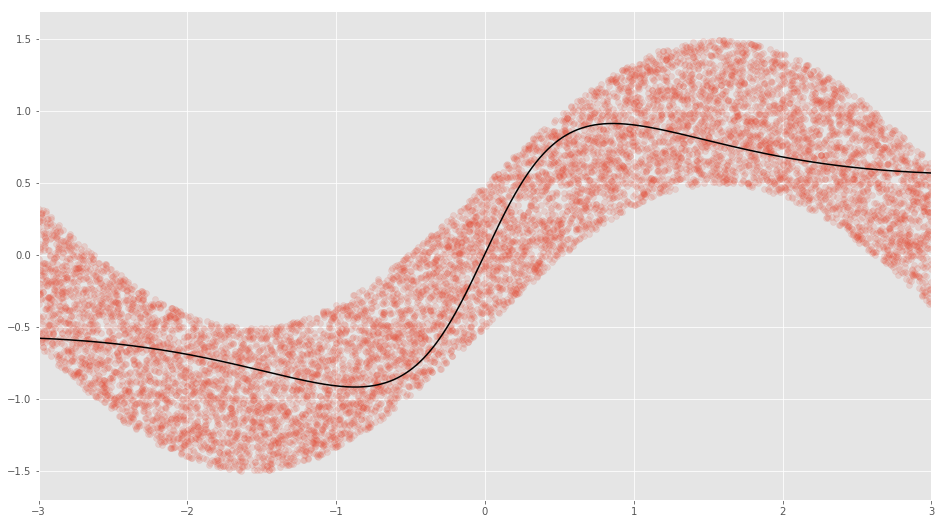

In [19]:
train(X, Y, preds, eta = 0.001)

In [20]:
def linear(X, n_input, n_output, activation  = None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev = 0.1), 
                    name = 'W')
    b = tf.Variable(tf.constant(0, dtype = tf.float32, shape = [n_output]), 
                    name = 'b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name = 'h')
    return h

In [21]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [22]:
X = tf.placeholder(tf.float32, name = 'X')
h = linear(X, 2, 10)
[op.name for op in g.get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

In [23]:
# Redo with name scopes
def linear(X, n_input, n_output, activation = None, scope = None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
            name = 'W', 
            shape = [n_input, n_output],
            initializer = tf.random_normal_initializer(mean = 0.0, 
                                                       stddev = 0.1))
        b = tf.get_variable(
            name = 'b', 
            shape = [n_output], initializer = tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [24]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [25]:
X = tf.placeholder(tf.float32, name = 'X')
h = linear(X, 2, 10, scope = 'layer1')

In [26]:
[op.name for op in g.get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [27]:
h2 = linear(h, 10, 10, scope = 'layer2')
h3 = linear(h2, 10, 3, scope = 'layer3')

In [28]:
[op.name for op in g.get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

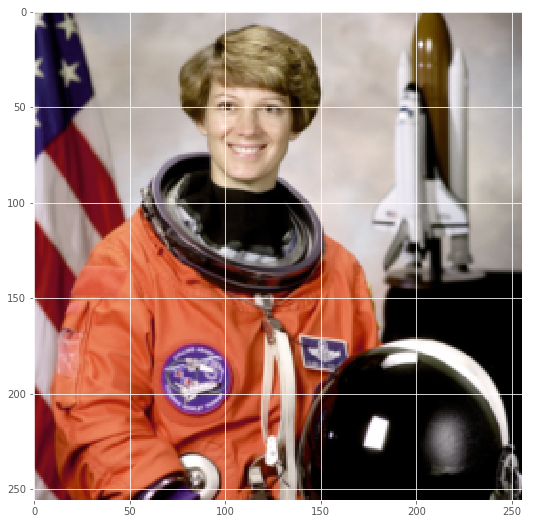

In [132]:
img = imresize(astronaut(), (256, 256))
plt.imshow(img);

In [133]:
xs = [] # pixel locations
ys = [] # color at each pixel

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        xs.append([i, j])
        ys.append(img[i, j])

In [134]:
xs = np.array(xs)
ys = np.array(ys)
# normalize
xs = (xs - np.mean(xs)) / np.std(xs)

xpred = []
for i in range(-5, img.shape[0] + 6):
    for j in range(-5, img.shape[1] + 6):
        xpred.append([i, j])

In [135]:
len(xpred)

71289

In [136]:
xs.shape, ys.shape, img.shape

((65536, 2), (65536, 3), (256, 256, 3))

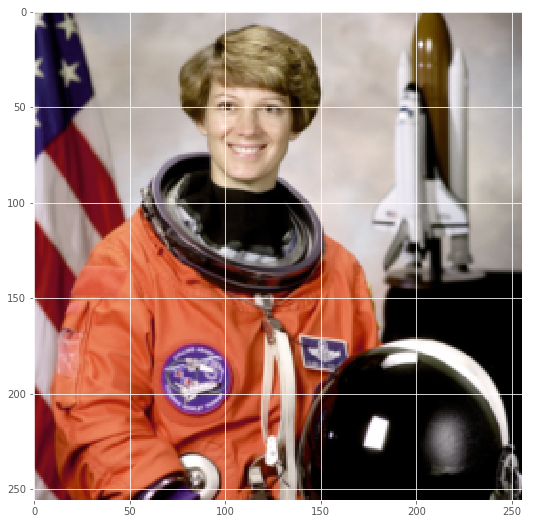

In [137]:
plt.imshow(ys.reshape(img.shape));

In [138]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [139]:
X = tf.placeholder(tf.float32, shape = [None, 2], name = 'X')
Y = tf.placeholder(tf.float32, shape = [None, 3], name = 'Y')

In [140]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3] # per layer
current_input = X

for layer in range(1, len(n_neurons)):
    current_input = linear(
        X = current_input, 
        n_input = n_neurons[layer - 1],
        n_output = n_neurons[layer],
        activation = tf.nn.relu if (layer + 1) < len(n_neurons) else None,
        scope = 'layer' + str(layer))

In [141]:
Y_pred = current_input

In [142]:
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))

In [143]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Iteration   0 Cost: 124.66489
Iteration   1 Cost: 110.16992
Iteration   2 Cost: 104.84232
Iteration   4 Cost: 92.86067
Iteration   8 Cost: 79.47256
Iteration  16 Cost: 70.05318
Iteration  32 Cost: 57.07869
Iteration  64 Cost: 44.67537
Iteration 125 Cost: 37.52656
Iteration 250 Cost: 30.03032
Iteration 499 Cost: 26.19448


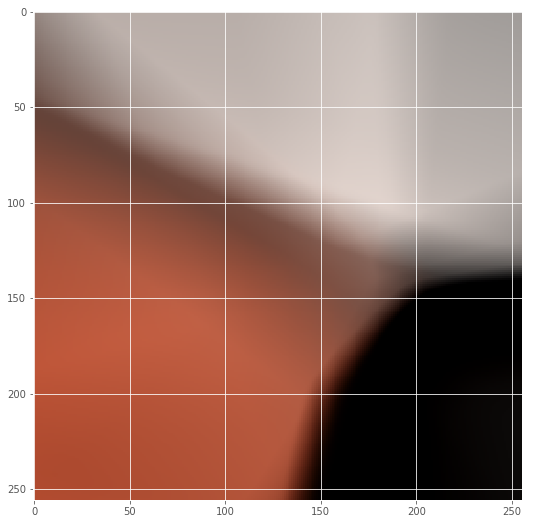

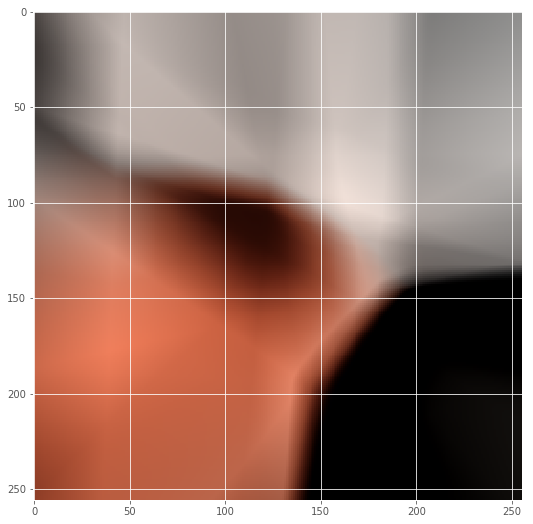

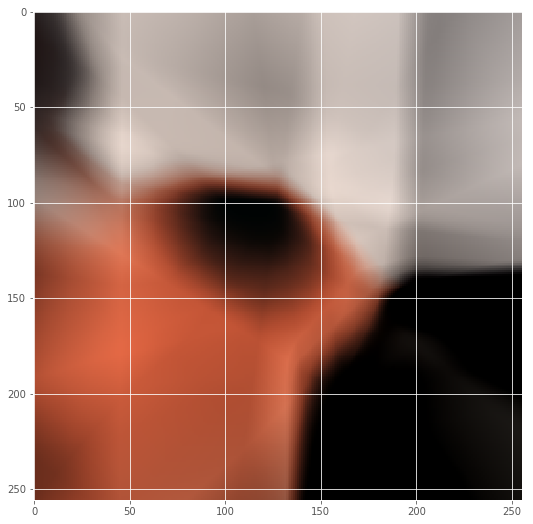

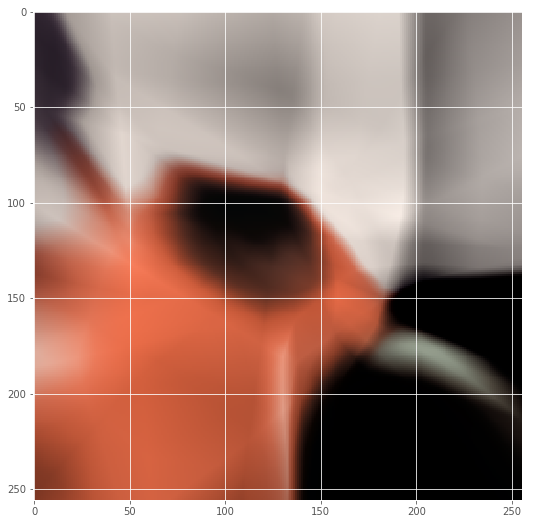

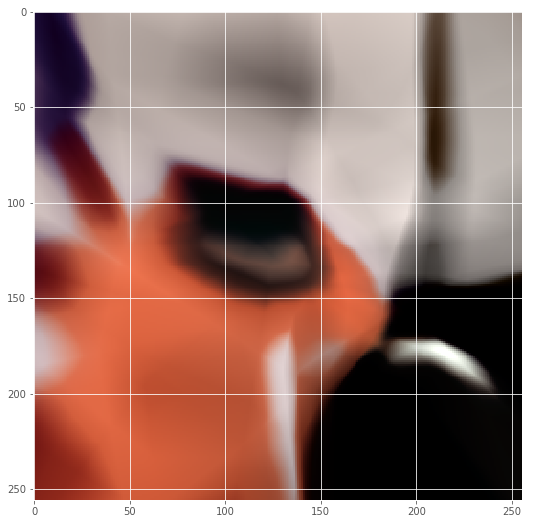

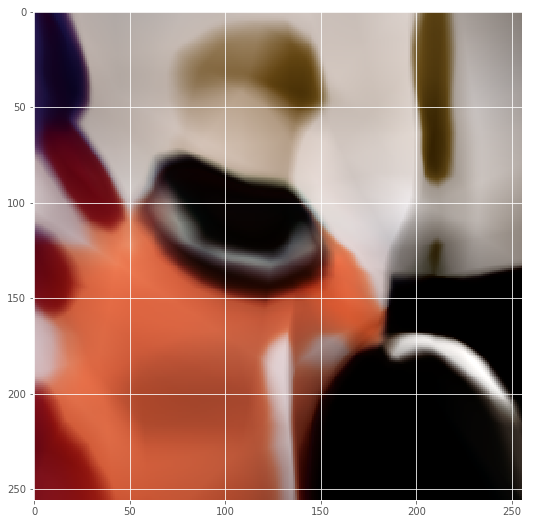

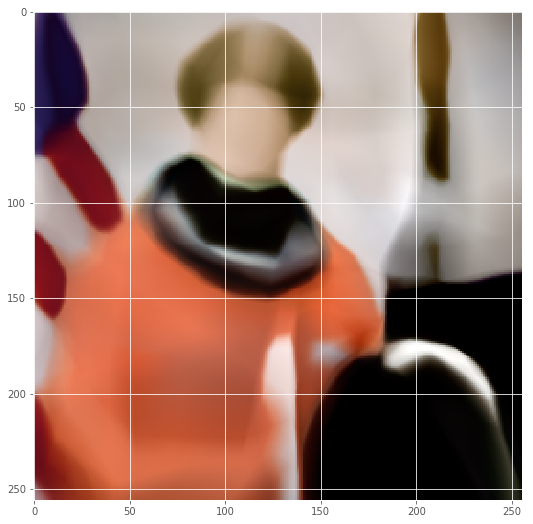

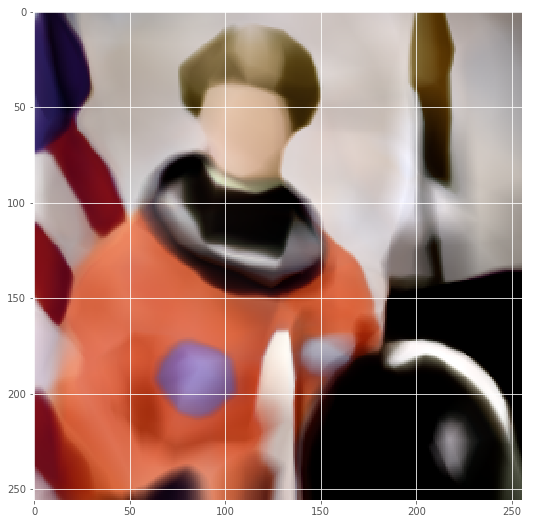

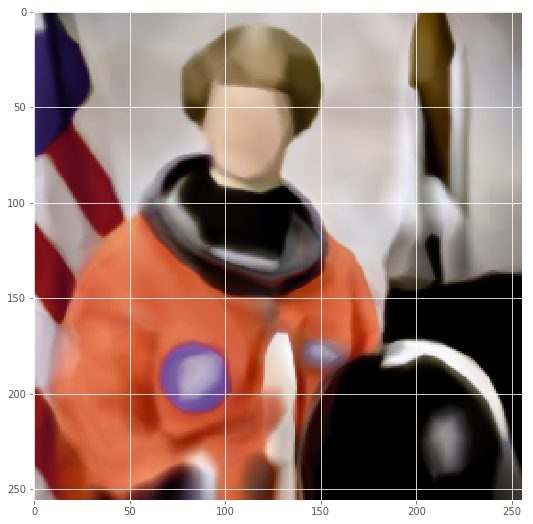

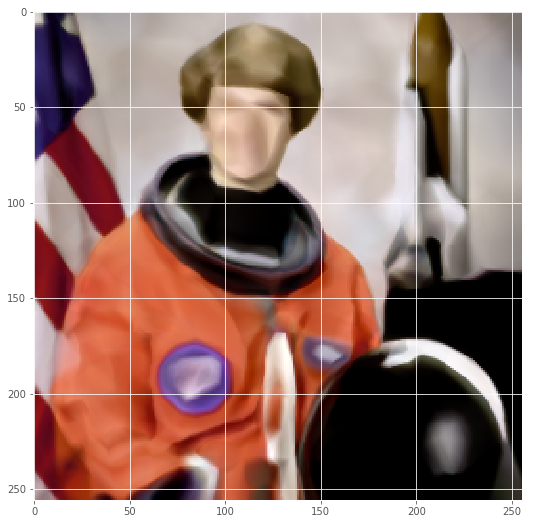

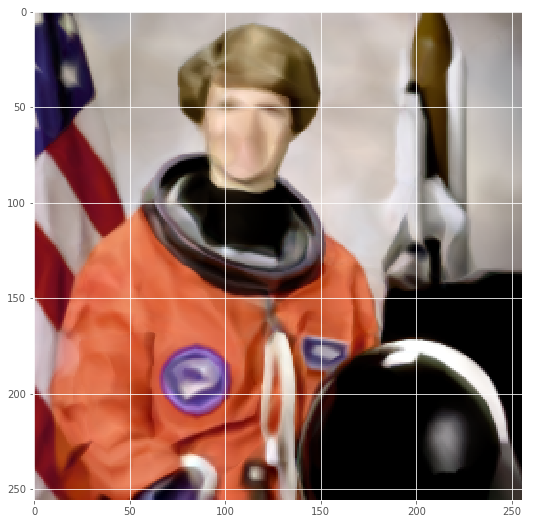

In [148]:
n_iterations = 500
batch_size = 50

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    prev_training_cost = 0.
    
    for i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch in range(n_batches):
            idx = idxs[batch * batch_size : (batch + 1) * batch_size]
            s.run(optimizer, feed_dict = { X: xs[idx], Y: ys[idx] })
            
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if i in [0, 1, 2, 4, 8, 16, 32, 64, 125, 250, 499]:
            print('Iteration %3d Cost: %.5f' %(i, training_cost))
            ys_pred = Y_pred.eval(feed_dict = { #X: xpred 
                                                X: xs },
                                  session = s)
            plt.figure();
            img = np.clip(
                #ys_pred.reshape([75, 75, 3]), 0, 255)\
                ys_pred.reshape(img.shape), 0, 255)\
                .astype(np.uint8)
            plt.imshow(img);